### Building a model to predict the future salary of a new employee 

In [2]:
# Importing the dataset
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

In [3]:
# Fitting Linear Regression to the dataset
lin_reg = lm(formula = Salary ~ .,
             data = dataset)

In [4]:
# Fitting Polynomial Regression to the dataset
dataset$Level2 = dataset$Level^2
dataset$Level3 = dataset$Level^3
dataset$Level4 = dataset$Level^4
poly_reg = lm(formula = Salary ~ .,
              data = dataset)

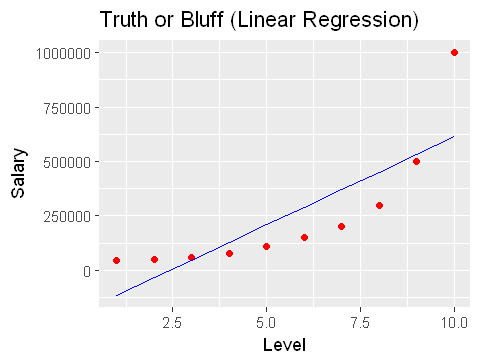

In [13]:
# Visualising the Linear Regression results
library(repr)
# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)

library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(lin_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Linear Regression)') +
  xlab('Level') +
  ylab('Salary')

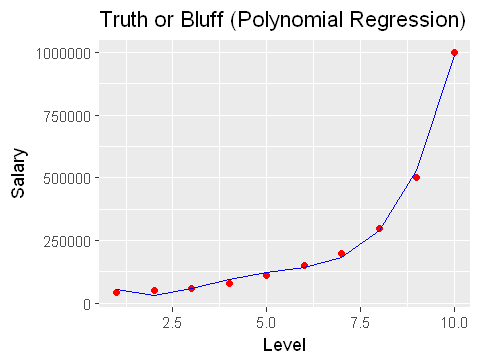

In [14]:
# Visualising the Polynomial Regression results

library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(poly_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')

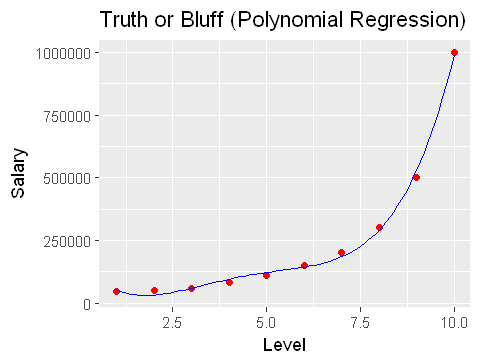

In [15]:
# Visualising the Regression Model results (for higher resolution and smoother curve)

library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(poly_reg,
                                        newdata = data.frame(Level = x_grid,
                                                             Level2 = x_grid^2,
                                                             Level3 = x_grid^3,
                                                             Level4 = x_grid^4))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')

In [16]:
# Predicting a new result with Linear Regression
predict(lin_reg, data.frame(Level = 6.5))

1 
330378.8

The salary of 330k sounds absurd and creates a little suspicion on the model.

In [9]:
# Predicting a new result with Polynomial Regression
predict(poly_reg, data.frame(Level = 6.5,
                             Level2 = 6.5^2,
                             Level3 = 6.5^3,
                             Level4 = 6.5^4))

1 
158862.5

It can be clearly observed that there is an underlying non-linear trend in the data.

The salary 160k appears and sounds appropriate to a job level of 6.5.